In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
sentiments = pd.read_csv("../data/sentiment/sentiment_days.csv")
sentiments.date = pd.to_datetime(sentiments.date, format='%Y-%m-%d')
stocks = pd.read_csv("../data/percent_change/relative_change.csv")
stocks.date = pd.to_datetime(stocks.date, format='%Y%m%d')
stocks.drop(['Unnamed: 0'], axis=1, inplace=True)
stocks = stocks[(stocks.date > '2005-12-31') & (stocks.date < '2017-12-31')]

In [3]:
sentiments.head(1)

,date,mode,Sum_QDAP,Sum,Mean_QDAP,Mean
0,2006-01-01,negative,-5.909524,negative,-0.060301,negative


In [4]:
stocks.head(1)

,ticker,date,close,rel_difference_close_open,rel_difference_close_close
2200632,AAC,2006-01-03,1.64,0.015244,0.051829


In [5]:
sentiments['prior_date']=sentiments.date + datetime.timedelta(days=1)
data = stocks.merge(sentiments, left_on='date', right_on='prior_date', how='inner')

In [6]:
data.head(3)

,ticker,date_x,close,rel_difference_close_open,rel_difference_close_close,date_y,mode,Sum_QDAP,Sum,Mean_QDAP,Mean,prior_date
0,AAC,2006-01-03,1.640,0.015244,0.051829,2006-01-02,neutral,-4.304762,negative,-0.031887,negative,2006-01-03
1,AAE,2006-01-03,0.365,0.054795,0.068493,2006-01-02,neutral,-4.304762,negative,-0.031887,negative,2006-01-03
2,AAM,2006-01-03,0.255,-0.098039,-0.078431,2006-01-02,neutral,-4.304762,negative,-0.031887,negative,2006-01-03


In [7]:
ticker = 'QAN'
groups = data.groupby('ticker')
tick_dat = groups.get_group(ticker)

svr = SVR(kernel='rbf')
train, test = train_test_split(tick_dat, test_size=0.2)

train_X = train[['Sum_QDAP']]
train_Y = train[['rel_difference_close_open']]
test_X = test[['Sum_QDAP']]
test_Y = test[['rel_difference_close_open']]

model = svr.fit(train_X, train_Y.values.ravel())
predict = model.predict(test_X)
print(model.score(test_X,test_Y))

-10.222493898997273


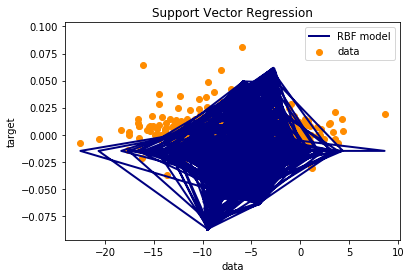

In [8]:
lw = 2
plt.scatter(test_X, test_Y, color='darkorange', label='data')
plt.plot(test_X, predict, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()